# Data Science Project - Analysis of Airbnb Data

42577 Introduction to Business Analytics course - Group 13

Students: Andreas Ipsen (s174021) | Andro Kranjcevic (s204704) | Smári Steinn Ársælsson (s222554) | Bjarki Rúnar Sverrisson (s222547)

## Table of Contents
* [1.Data preparation and descriptive statistics](#chapter1)
    * [1.1 Columns with review values ](#section_1_1)
    * [1.2 Coulmns with price values](#section_1_1)
    * [1.3 columns with geographical values](#section_1_1)
    * [Section 1.4](#section_1_1)
        * [Sub Section 1.1.1](#sub_section_1_1_1)
* [2.Prediction challenge](#chapter2)
    * [Binary classification](#section_2_1)
        * [Sub Section 2.1.1](#sub_section_2_1_1)
    * [Multi class classification](#section_2_2)
        * [Sub Section 2.2.1](#sub_section_2_2_1)
* [3.Exploratory component](#chapter3)
    * [Section 3.1](#section_3_1)
        * [Sub Section 3.1.1](#sub_section_3_1_1)
    * [Section 3.2](#section_3_2)
        * [Sub Section 3.2.1](#sub_section_3_2_1)

After moving to San Francisco in October 2007, roommates Brian Chesky and Joe Gebbia decided to turn their living room into accommodation and discovered a business opportunity. Shortly after, a web platform where users can rent out their place to host travelers was established, today known as Airbnb. The project will focus on data analysis of rental pricing, geographical factors, and feedback values on Airbnb for various periods of stay, to assist both, renters, and tenants with decision-making, and therefore, creating value for both sides. Our findings should help customers select reliable, and affordable listing for their stay, and support the renters in their actions for increasing their profit.

The first part of the notebook is about cleaning and preparing the dataset for further analysis and descriptive statistics, and
to get a greater overview of the data. Dataset will be cleaned further by not considering outliers, and columns consisting of wrong, or NaN values. The dataset will be prepared further by independently performing an analysis of features, corresponding to their review, price, and geographical values.



# 1. Data preperation and descriptive statistics

Imorting the dataset and packages that will be used.

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [122]:
data=pd.read_csv("listings_CPH.csv")

In [123]:
data.head()   #display first 5 rows

id                                               name  host_id  \
0   6983                               Copenhagen 'N Livin'    16774   
1  26057                Lovely house - most attractive area   109777   
2  26473          City Centre Townhouse Sleeps 1-10 persons   112210   
3  29118                    Best Location in Cool Istedgade   125230   
4  31094  Beautiful, spacious, central, renovated Penthouse   129976   

  host_name  neighbourhood_group              neighbourhood   latitude  \
0     Simon                  NaN                    Nrrebro  55.686410   
1      Kari                  NaN                   Indre By  55.693070   
2     Julia                  NaN                   Indre By  55.676020   
3      Nana                  NaN  Vesterbro-Kongens Enghave  55.670230   
4      Ebbe                  NaN  Vesterbro-Kongens Enghave  55.666602   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  12.547410  Entire home/apt    898               3                172   
1  12.576490  Entire home/apt   2600               4                 59   
2  12.575400  Entire home/apt   3250               3                300   
3  12.555040  Entire home/apt    725               7                 24   
4  12.555283  Entire home/apt   1954               3                 19   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2022-06-21               1.08                               1   
1  2022-08-09               0.55                               1   
2  2022-09-10               2.06                               3   
3  2022-08-04               0.16                               1   
4  2022-08-22               0.13                               1   

   availability_365  number_of_reviews_ltm  license  
0                 0                      4      NaN  
1               303                      8      NaN  
2                56                      7      NaN  
3                59                      2      NaN  
4                 0                      2      NaN

We can start by simply checking the length and shape of the dataset.

In [124]:
data.shape

(13815, 18)

It is important to have an overview of which data types the dataset consists of.

In [61]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

It is visible that 'last_review' is an object, and not datetime object. Therefore, pandas to_datetime function is used to parse the column as DateTime.

In [62]:
data['last_review']=pd.to_datetime(data['last_review'],format='%Y-%m-%d')
data.dtypes 

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                  float64
dtype: object

We should also investigate the description of the numerical data. 

In [63]:
data.describe().T

count          mean           std  \
id                              13815.0  1.719385e+17  2.852538e+17   
host_id                         13815.0  1.064145e+08  1.302801e+08   
neighbourhood_group                 0.0           NaN           NaN   
latitude                        13815.0  5.568057e+01  2.108847e-02   
longitude                       13815.0  1.255781e+01  3.351154e-02   
price                           13815.0  1.205879e+03  1.433143e+03   
minimum_nights                  13815.0  4.605574e+00  1.690015e+01   
number_of_reviews               13815.0  1.857112e+01  3.640267e+01   
reviews_per_month               12170.0  9.038159e-01  1.110754e+00   
calculated_host_listings_count  13815.0  4.400651e+00  2.129857e+01   
availability_365                13815.0  9.330264e+01  1.231620e+02   
number_of_reviews_ltm           13815.0  5.451104e+00  1.137398e+01   
license                             0.0           NaN           NaN   

                                        min           25%           50%  \
id                               6983.00000  1.907962e+07  3.931542e+07   
host_id                         11718.00000  1.356383e+07  4.656301e+07   
neighbourhood_group                     NaN           NaN           NaN   
latitude                           55.60951  5.566611e+01  5.568119e+01   
longitude                          12.43567  1.254029e+01  1.255552e+01   
price                               0.00000  7.290000e+02  9.950000e+02   
minimum_nights                      1.00000  2.000000e+00  3.000000e+00   
number_of_reviews                   0.00000  2.000000e+00  7.000000e+00   
reviews_per_month                   0.01000  2.300000e-01  5.300000e-01   
calculated_host_listings_count      1.00000  1.000000e+00  1.000000e+00   
availability_365                    0.00000  0.000000e+00  2.000000e+01   
number_of_reviews_ltm               0.00000  0.000000e+00  3.000000e+00   
license                                 NaN           NaN           NaN   

                                         75%           max  
id                              5.665348e+17  7.222925e+17  
host_id                         1.553486e+08  4.805803e+08  
neighbourhood_group                      NaN           NaN  
latitude                        5.569577e+01  5.574280e+01  
longitude                       1.258074e+01  1.265174e+01  
price                           1.368500e+03  6.490000e+04  
minimum_nights                  4.000000e+00  1.111000e+03  
number_of_reviews               2.000000e+01  7.110000e+02  
reviews_per_month               1.120000e+00  2.402000e+01  
calculated_host_listings_count  1.000000e+00  1.790000e+02  
availability_365                1.740000e+02  3.650000e+02  
number_of_reviews_ltm           6.000000e+00  4.710000e+02  
license                                  NaN           NaN

By looking at both, numeric and, object series in DataFrame above, it was noticed that the columns ('license'), and ('neighbourhood_group') had count=0, meaning that they only consist of NaN values. They don't bring any value for further analysis, and therefore, both of the columns will be dropped.


In [64]:
data=data.drop(columns=['neighbourhood_group','license'])    #drop non-desired columns
data

id                                               name  \
0                    6983                               Copenhagen 'N Livin'   
1                   26057                Lovely house - most attractive area   
2                   26473          City Centre Townhouse Sleeps 1-10 persons   
3                   29118                    Best Location in Cool Istedgade   
4                   31094  Beautiful, spacious, central, renovated Penthouse   
...                   ...                                                ...   
13810  653494030951422457  Top-floor Villa Apartment in the Heart of Hell...   
13811  647809303952891559  Dejligt lille hus med flere hyggekroge ude og ...   
13812  650819220455514228  Lejlighed i Storkøbenhavn. 13 minutter fra cen...   
13813  658612163688161695     Cosy apartment with a great view in Copenhagen   
13814  648436253362373119     Big Bedroom connected with a large living room   

         host_id host_name              neighbourhood   latitude  longitude  \
0          16774     Simon                    Nrrebro  55.686410  12.547410   
1         109777      Kari                   Indre By  55.693070  12.576490   
2         112210     Julia                   Indre By  55.676020  12.575400   
3         125230      Nana  Vesterbro-Kongens Enghave  55.670230  12.555040   
4         129976      Ebbe  Vesterbro-Kongens Enghave  55.666602  12.555283   
...          ...       ...                        ...        ...        ...   
13810  465189427   Martine                    sterbro  55.732840  12.572370   
13811    4862421  Kathrine                      Valby  55.667782  12.463285   
13812  134647873       Tim                      Valby  55.659536  12.474726   
13813  256903668       Sam               Brnshj-Husum  55.730971  12.487993   
13814  141288846     Tanja                 Bispebjerg  55.731420  12.521770   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt    898               3                172  2022-06-21   
1      Entire home/apt   2600               4                 59  2022-08-09   
2      Entire home/apt   3250               3                300  2022-09-10   
3      Entire home/apt    725               7                 24  2022-08-04   
4      Entire home/apt   1954               3                 19  2022-08-22   
...                ...    ...             ...                ...         ...   
13810  Entire home/apt   1250              14                  0         NaT   
13811  Entire home/apt    450               3                  3  2022-07-21   
13812  Entire home/apt    400               1                  3  2022-08-14   
13813  Entire home/apt    850               1                  0         NaT   
13814     Private room    420               2                  1  2022-07-07   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   1.08                               1                 0   
1                   0.55                               1               303   
2                   2.06                               3                56   
3                   0.16                               1                59   
4                   0.13                               1                 0   
...                  ...                             ...               ...   
13810                NaN                               1                 0   
13811               1.01                               1                 0   
13812               1.27                               1                 0   
13813                NaN                               1                 0   
13814               0.37                               2                 0   

       number_of_reviews_ltm  
0                          4  
1                          8  
2                          7  
3                          2  
4                          2  
...                      ... 

In [66]:
#data=data.dropna(axis='columns')   #drop all NaN values across the columns
#data   #rather drop the last column  #maybe drop few more unrelated columns

# 1.1 Columns with review values

The selected columns are containing review values, describing the amount, monthly occurrence, and date of the reviews. The rows with NaN values will be dropped, as it is known that they won't provide any information regarding the review status, and will not be taken into consideration. The aim is to sort the data in a way, that contains only the properties with feedback (review), and with the most recent reviews (<1 year), which are not outdated.

In [73]:
data=data.dropna(subset=['number_of_reviews','last_review','reviews_per_month','number_of_reviews_ltm'])  #drop NaN in selected columns

In [74]:
data.head()

id                                               name  host_id  \
0   6983                               Copenhagen 'N Livin'    16774   
1  26057                Lovely house - most attractive area   109777   
2  26473          City Centre Townhouse Sleeps 1-10 persons   112210   
3  29118                    Best Location in Cool Istedgade   125230   
4  31094  Beautiful, spacious, central, renovated Penthouse   129976   

  host_name              neighbourhood   latitude  longitude        room_type  \
0     Simon                    Nrrebro  55.686410  12.547410  Entire home/apt   
1      Kari                   Indre By  55.693070  12.576490  Entire home/apt   
2     Julia                   Indre By  55.676020  12.575400  Entire home/apt   
3      Nana  Vesterbro-Kongens Enghave  55.670230  12.555040  Entire home/apt   
4      Ebbe  Vesterbro-Kongens Enghave  55.666602  12.555283  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    898               3                172  2022-06-21               1.08   
1   2600               4                 59  2022-08-09               0.55   
2   3250               3                300  2022-09-10               2.06   
3    725               7                 24  2022-08-04               0.16   
4   1954               3                 19  2022-08-22               0.13   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               1                 0                      4  
1                               1               303                      8  
2                               3                56                      7  
3                               1                59                      2  
4                               1                 0                      2

To have a better overview of the columns containing review values, they will be merged into a new dataframe 'data_merge'. 

In [139]:
data1=data[data.select_dtypes(include=['float64','int64','object','datetime64[ns]']).columns].iloc[:,10:13]  #index range of wanted columns
data2=data[data.select_dtypes(include=['int64']).columns].iloc[:,16:17]  #index range of wanted columns
data_merge=pd.merge(data1,data2, on=data['id'])    #merge review columns with dependence on default index


In [140]:
data_merge

key_0  minimum_nights  number_of_reviews last_review
0                    6983               3                172  2022-06-21
1                   26057               4                 59  2022-08-09
2                   26473               3                300  2022-09-10
3                   29118               7                 24  2022-08-04
4                   31094               3                 19  2022-08-22
...                   ...             ...                ...         ...
13810  653494030951422457              14                  0         NaN
13811  647809303952891559               3                  3  2022-07-21
13812  650819220455514228               1                  3  2022-08-14
13813  658612163688161695               1                  0         NaN
13814  648436253362373119               2                  1  2022-07-07

[13815 rows x 4 columns]

Rows containing 0 reviews, and on top of that, having no reviews in last 12 months ('number_of_reviews_ltm') are not going to be considered in our analysis, and therefore, are dropped.

In [117]:
data_merge1=data_merge[data_merge!=0].dropna()   #drop review rows containing 0
data_merge1

key_0  number_of_reviews last_review  reviews_per_month
0                    6983                172  2022-06-21               1.08
1                   26057                 59  2022-08-09               0.55
2                   26473                300  2022-09-10               2.06
3                   29118                 24  2022-08-04               0.16
4                   31094                 19  2022-08-22               0.13
...                   ...                ...         ...                ...
12165  646726550705810749                  4  2022-08-28               1.85
12166  646941499450912133                  4  2022-09-04               1.64
12167  647809303952891559                  3  2022-07-21               1.01
12168  650819220455514228                  3  2022-08-14               1.27
12169  648436253362373119                  1  2022-07-07               0.37

[12170 rows x 4 columns]

In total, removal of rows with no reviews resulted in discarding 2253 insignificant rows.

In [118]:
# check the number of rows before removing the ones without reviews
count_before=data_merge['number_of_reviews_ltm'].count()
print("Total number of rows with or without reviews:", count_before)
# check the number of rows after removing the ones without reviews
count_after=data_merge1['number_of_reviews_ltm'].count()
print("Number of rows with at least 1 review:",count_after)
print("Rows with no reviews:",count_before-count_after)

KeyError: 'number_of_reviews_ltm'

The next step is to visualize the relevant columns with  review values, for the outliers detection, and further investigation.

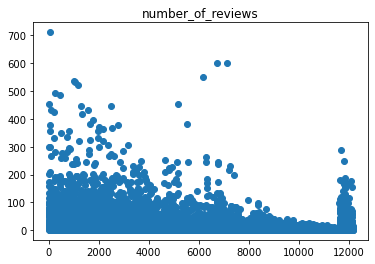

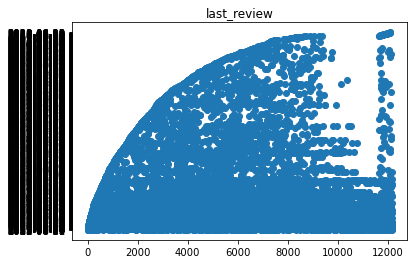

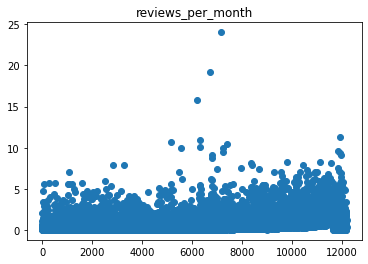

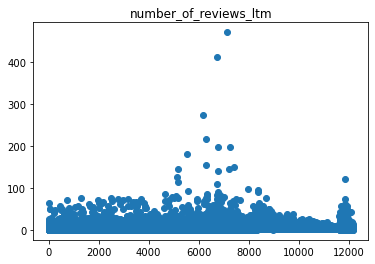

In [133]:
data_merge_col=['number_of_reviews', 'last_review', 'reviews_per_month',
       'number_of_reviews_ltm']
for i in range(len(data_merge_col)):
    plt.scatter(range(0,len(data[data_merge_col[i]])),data[data_merge_col[i]])
    plt.title(data_merge_col[i])
    plt.show()

As expected, all the plots above have similar distribution, and outlier position. The plot we're most interested in is 'number_of _reviews_ltm', as it does not contain outdated reviews.  


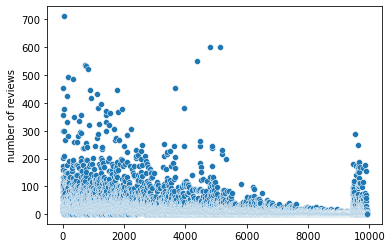

In [134]:
sb.scatterplot(x=range(len(data_merge1)),y=data_merge1['number_of_reviews_ltm'])
plt.ylabel("Number of reviews in last 12 months")
plt.show()

In this case, outliers will be considered the points with value bigger than 500. 

In [135]:
data.loc[data["number_of_reviews_ltm"] > 500]   #display only the rows with more than 500 reviews

id                                               name    host_id  \
57      330915                 Lovely room - in the heart of CPH!     799887   
1065   4282001                 Welcome to Sundbyvestervarehus B&B   20733123   
1102   4446663                                   værelse til leje   22317683   
1228   5214777                   Christianshavn room with balcony   25705162   
6476  38542262                Copenhagens coolest hostel concept!  293981283   
7099  42501574  Aperon Apartment Hotel | 24/7 service | Prime ...  331283054   
7570  44470634                           CityHub Copenhagen, Hub!  350780407   

         host_name  neighbourhood_group              neighbourhood  latitude  \
57           Bente                  NaN  Vesterbro-Kongens Enghave  55.67365   
1065         Britt                  NaN                Amager Vest  55.65204   
1102           Pia                  NaN  Vesterbro-Kongens Enghave  55.66851   
1228        Jesper                  NaN                   Indre By  55.67055   
6476  Urban Camper                  NaN                 Bispebjerg  55.70322   
7099        Aperon                  NaN                   Indre By  55.68213   
7570      CityHost                  NaN  Vesterbro-Kongens Enghave  55.67167   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
57     12.55581     Private room    404               1                711   
1065   12.60875     Private room    500               1                536   
1102   12.55689     Private room    425               1                533   
1228   12.58627     Private room    584               2                520   
6476   12.53800      Shared room    198               1                550   
7099   12.57523  Entire home/apt   1529               1                602   
7570   12.54656     Private room    721               1                599   

     last_review  reviews_per_month  calculated_host_listings_count  \
57    2022-09-06               5.55                               3   
1065  2022-09-06               5.56                               1   
1102  2022-09-13               5.57                               3   
1228  2022-09-04               5.60                               1   
6476  2022-09-09              15.74                               1   
7099  2022-09-22              19.23                               6   
7570  2022-09-07              24.02                               3   

      availability_365  number_of_reviews_ltm  license  
57                  31                     49      NaN  
1065               172                     14      NaN  
1102               266                     29      NaN  
1228                58                     57      NaN  
6476               364                    275      NaN  
7099               364                    411      NaN  
7570               362                    471      NaN

It is visible from the plot above that all the stayings considered as an outliers were of very short duration. Because of that, much more customers went through the property, and therefore amount of provided reviews was high, whereas it is most likely that properites which "raised the bar" on a minimum stay cannot rely much on a customer feedback.

In [145]:
data_merge1.corr()

key_0  number_of_reviews  reviews_per_month
key_0              1.000000          -0.233720           0.395591
number_of_reviews -0.233720           1.000000           0.375942
reviews_per_month  0.395591           0.375942           1.000000

# 1.2 Columns with price values

In [72]:
data.T

0      \
id                                              6983   
name                            Copenhagen 'N Livin'   
host_id                                        16774   
host_name                                      Simon   
neighbourhood_group                              NaN   
neighbourhood                                Nrrebro   
latitude                                    55.68641   
longitude                                   12.54741   
room_type                            Entire home/apt   
price                                            898   
minimum_nights                                     3   
number_of_reviews                                172   
last_review                               2022-06-21   
reviews_per_month                               1.08   
calculated_host_listings_count                     1   
availability_365                                   0   
number_of_reviews_ltm                              4   
license                                          NaN   

                                                              1      \
id                                                            26057   
name                            Lovely house - most attractive area   
host_id                                                      109777   
host_name                                                      Kari   
neighbourhood_group                                             NaN   
neighbourhood                                              Indre By   
latitude                                                   55.69307   
longitude                                                  12.57649   
room_type                                           Entire home/apt   
price                                                          2600   
minimum_nights                                                    4   
number_of_reviews                                                59   
last_review                                              2022-08-09   
reviews_per_month                                              0.55   
calculated_host_listings_count                                    1   
availability_365                                                303   
number_of_reviews_ltm                                             8   
license                                                         NaN   

                                                                    2      \
id                                                                  26473   
name                            City Centre Townhouse Sleeps 1-10 persons   
host_id                                                            112210   
host_name                                                           Julia   
neighbourhood_group                                                   NaN   
neighbourhood                                                    Indre By   
latitude                                                         55.67602   
longitude                                                         12.5754   
room_type                                                 Entire home/apt   
price                                                                3250   
minimum_nights                                                          3   
number_of_reviews                                                     300   
last_review                                                    2022-09-10   
reviews_per_month                                                    2.06   
calculated_host_listings_count                                          3   
availability_365                                                       56   
number_of_reviews_ltm                                                   7   
license                                                               NaN   

                                                          3      \
id                                                        29118   
name                            Be

In [73]:
price_median = np.median(f["price"])
print(price_median)

995.0


Graphs

<AxesSubplot:xlabel='neighbourhood'>

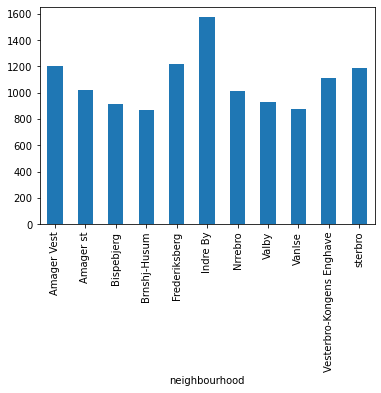

In [74]:
data.groupby("neighbourhood")["price"].mean().plot(kind="bar")

<AxesSubplot:xlabel='neighbourhood'>

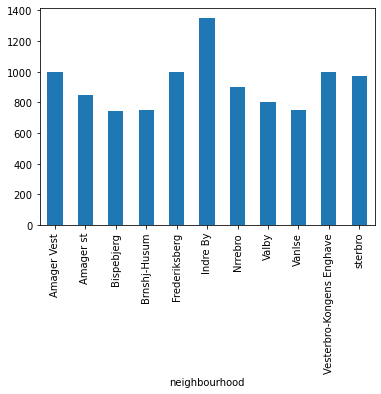

In [75]:
data.groupby("neighbourhood")["price"].median().plot(kind="bar")

<AxesSubplot:xlabel='room_type'>

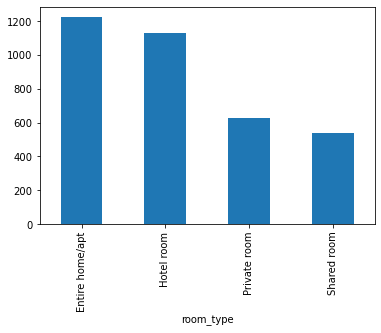

In [76]:
data.groupby("room_type")["price"].mean().plot(kind="bar")

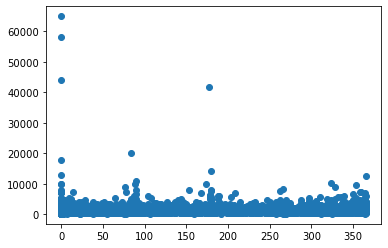

In [77]:
plt.scatter(data.availability_365,data.price)

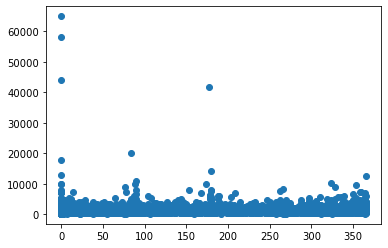

In [78]:
plt.scatter(data.availability_365,data.price)

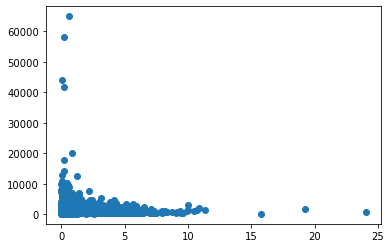

In [79]:
plt.scatter(data.reviews_per_month,data.price)

So we have 6 outliers that have way higher price than the rest. Lest try to take them out and plot these same 3 graphs again

In [80]:
dataset = data[data["price"]<30000]

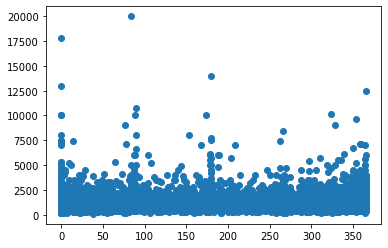

In [81]:
plt.scatter(dataset.availability_365,dataset.price)

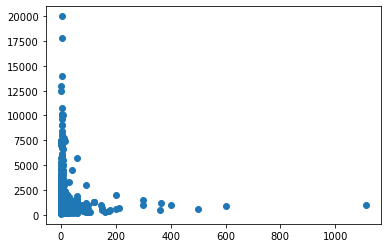

In [82]:
plt.scatter(dataset.minimum_nights,dataset.price)

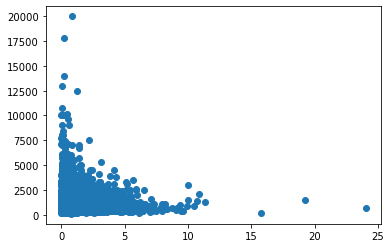

In [83]:
plt.scatter(dataset.reviews_per_month,dataset.price)

# 1.3 Columns with geographical values

In [84]:
#Find number of neighboorhoods in list
num_neighbourhoods=len(set(data.neighbourhood))-1 # Why -1?
print(num_neighbourhoods)

10


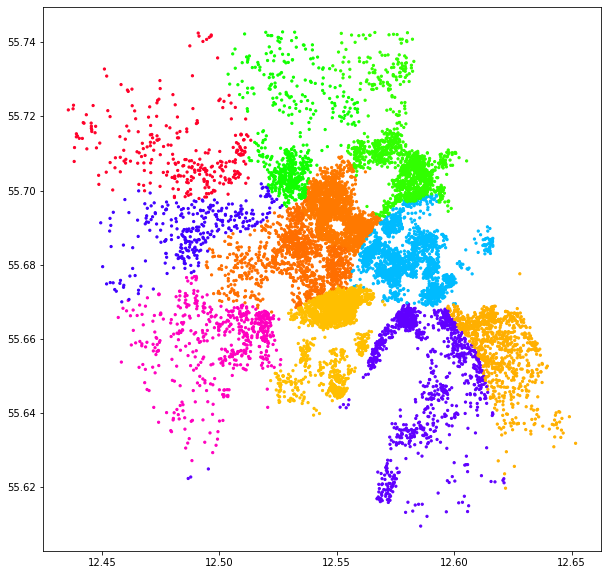

In [85]:
colors = [float(hash(s) % 256) / 256 for s in data.neighbourhood]      

plt.figure(figsize=(10,10))
plt.scatter(data.longitude,data.latitude, s=5,c=colors,cmap="gist_rainbow",label=data.neighbourhood)
plt.show()


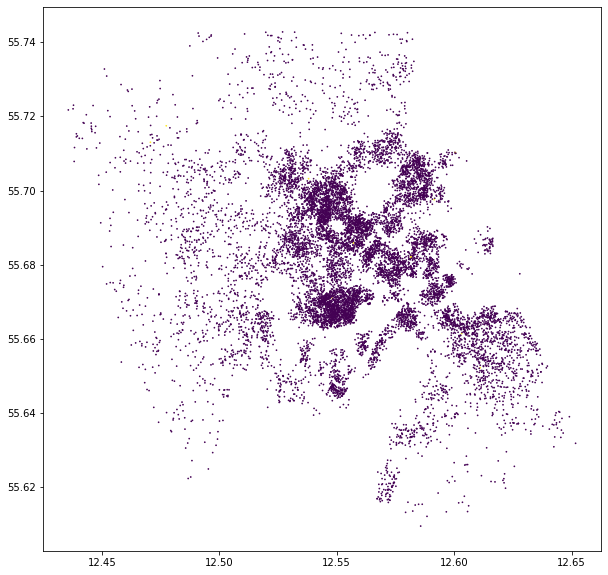

In [86]:
colors = [float(hash(s) % 4) / 4  for s in data.room_type]      

plt.figure(figsize=(10,10))
plt.scatter(data.longitude,data.latitude, s=0.5,c=colors)
plt.show()

In [89]:
import geopandas as gpd
import urllib

url = "https://kkkortdata.spatialsuite.dk/airview/CAV_25May2021.geojson"
remote_data = urllib.request.urlopen(url)
map_data = gpd.read_file(remote_data)
map_data.head()

FID  Shape_Leng  ROAD_FID  Mixed_NO2  Mixed_UFP  Mixed_BC  \
0    0   58.821698         1    -999999    -999999 -999999.0   
1    1   31.898519         2         10      18500       0.8   
2    2   36.276259         3          9      12800       0.8   
3    3   40.416066         4          9      10700       0.7   
4    4   32.734397         5         13      14500       1.1   

                                            geometry  
0  LINESTRING (12.57828 55.69392, 12.57752 55.69423)  
1  LINESTRING (12.62463 55.63461, 12.62473 55.63433)  
2  LINESTRING (12.58604 55.60184, 12.58595 55.602...  
3  LINESTRING (12.58629 55.59317, 12.58569 55.59305)  
4  LINESTRING (12.58135 55.59200, 12.58130 55.59171)

<Figure size 1080x1080 with 0 Axes>

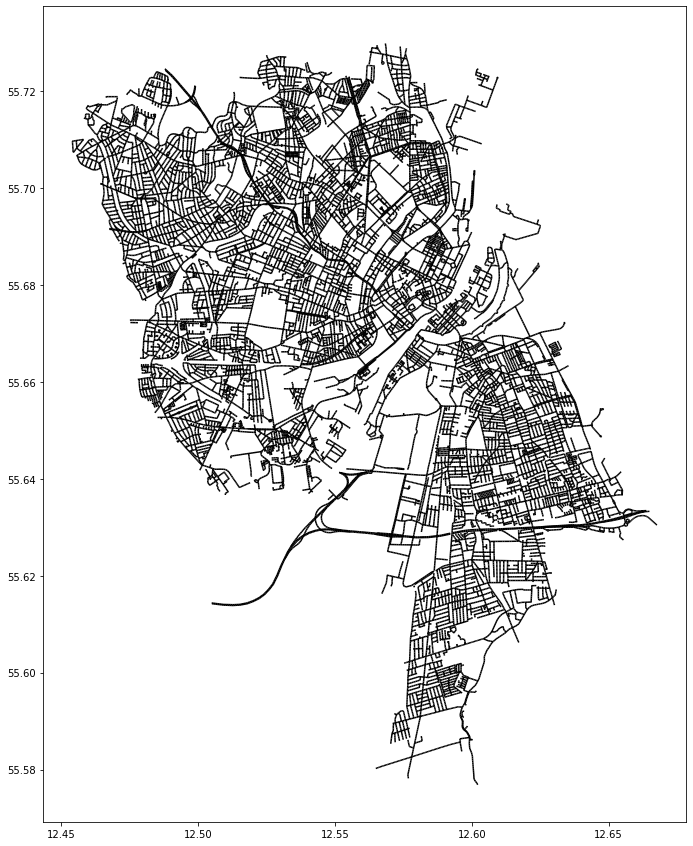

In [97]:
map_data.Mixed_BC=0
plt.figure(figsize=(15,15))
map_data.plot(column="Mixed_BC", cmap="gray",figsize=(15,15))
plt.show()


<Figure size 1080x1080 with 0 Axes>

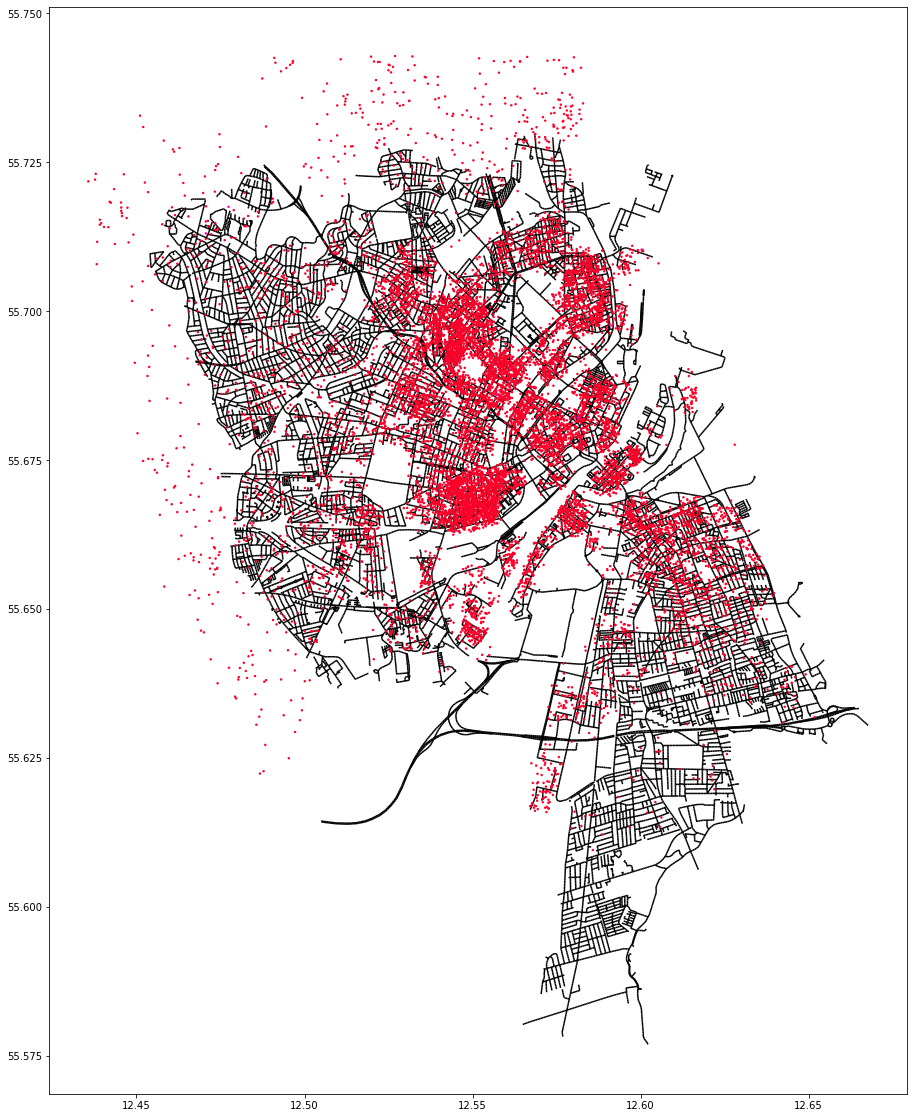

In [98]:

plt.figure(figsize=(15,15))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.

map_data.plot(column="Mixed_BC",zorder=0,cmap="gray",figsize=(20,20))
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)

plt.show();


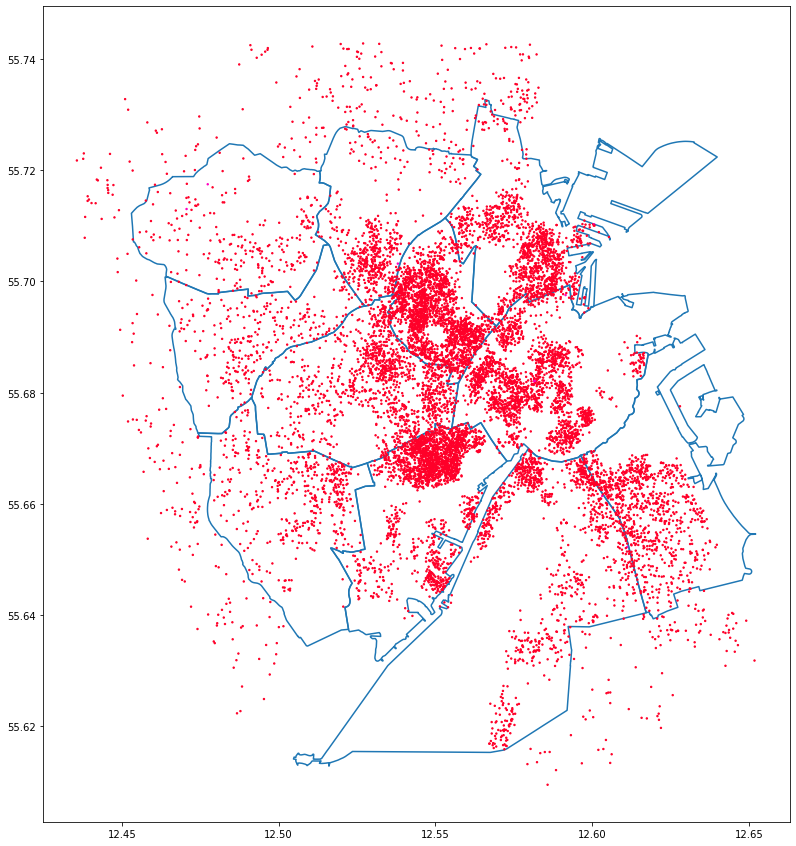

In [99]:

theHoods=gpd.read_file('neighbourhoods.geojson')
theHoods.boundary.plot(figsize=(15,15))
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)



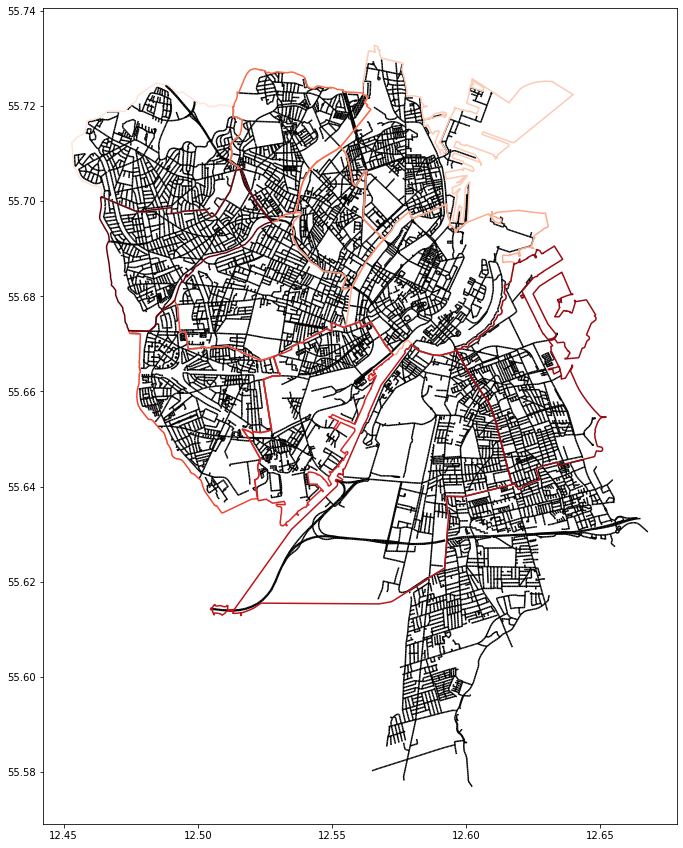

In [100]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

theHoods.boundary.plot(ax=ax,zorder=1,figsize=(15,15),cmap='Reds')
map_data.plot(ax=ax,column="Mixed_BC",zorder=0,cmap="gray")


plt.show();

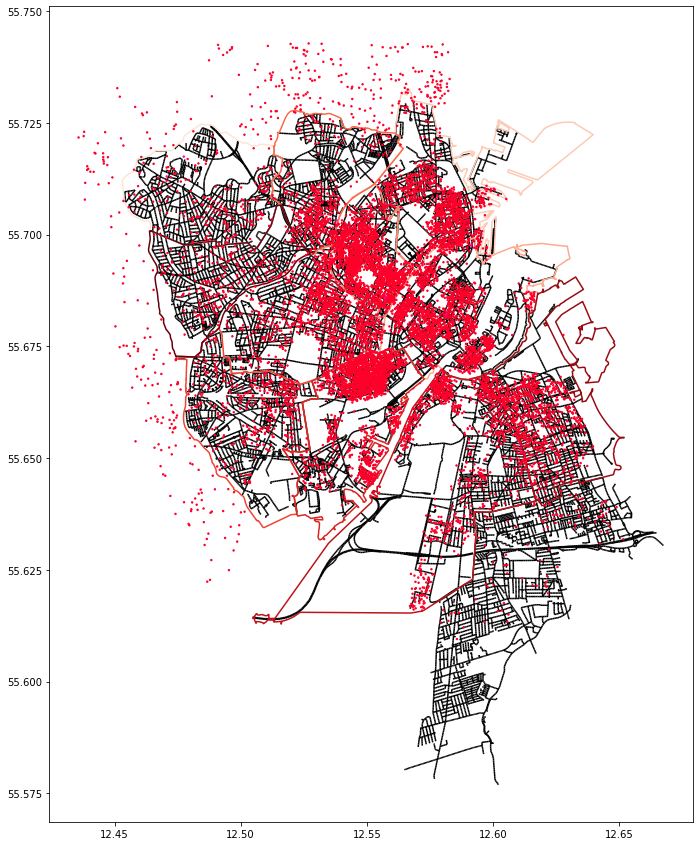

In [101]:
fig, ax = plt.subplots(figsize=(15,15)) #Has to be treated as a subplot. See geopandas documentation
ax.set_aspect('equal')

theHoods.boundary.plot(ax=ax,zorder=1,figsize=(15,15),cmap='Reds')
map_data.plot(ax=ax,column="Mixed_BC",zorder=0,cmap="gray")
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)


plt.show();

In [102]:
#Find number of neighboorhoods in list
num_neighbourhoods=len(set(data.neighbourhood))-1 # Why -1?
print(num_neighbourhoods)

10


In [ ]:
colors = [float(hash(s) % 256) / 256 for s in data.neighbourhood]      

plt.figure(figsize=(10,10))
plt.scatter(data.longitude,data.latitude, s=5,c=colors,cmap="gist_rainbow",label=data.neighbourhood)
plt.show()


In [ ]:
colors = [float(hash(s) % 4) / 4  for s in data.room_type]      

plt.figure(figsize=(10,10))
plt.scatter(data.longitude,data.latitude, s=0.5,c=colors)
plt.show()

In [ ]:
import geopandas as gpd
import urllib

url = "https://kkkortdata.spatialsuite.dk/airview/CAV_25May2021.geojson"
remote_data = urllib.request.urlopen(url)
map_data = gpd.read_file(remote_data)
map_data.head()

<Figure size 1080x1080 with 0 Axes>

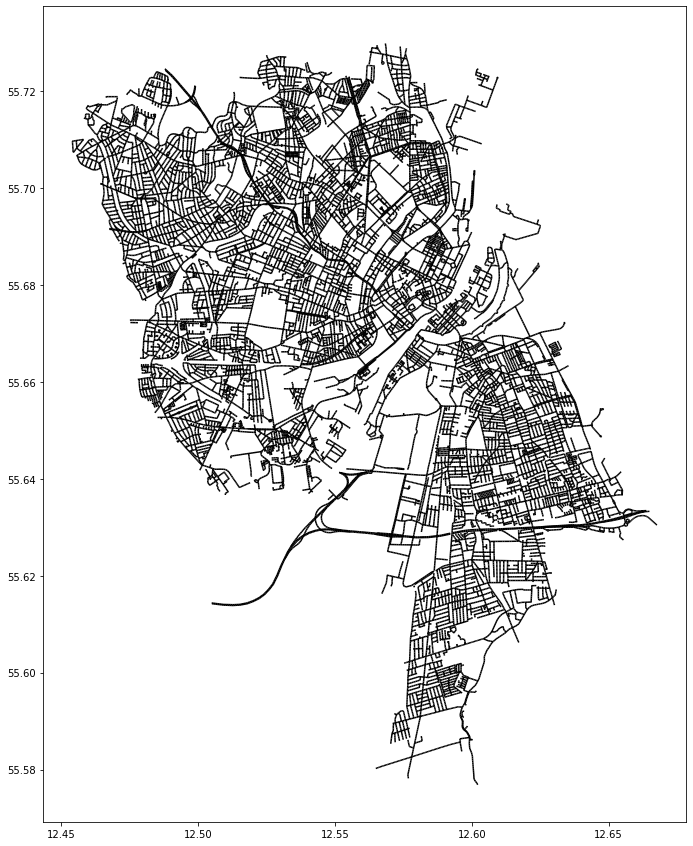

In [93]:
map_data.Mixed_BC=0
plt.figure(figsize=(15,15))
map_data.plot(column="Mixed_BC", cmap="gray",figsize=(15,15))
plt.show()


<Figure size 1080x1080 with 0 Axes>

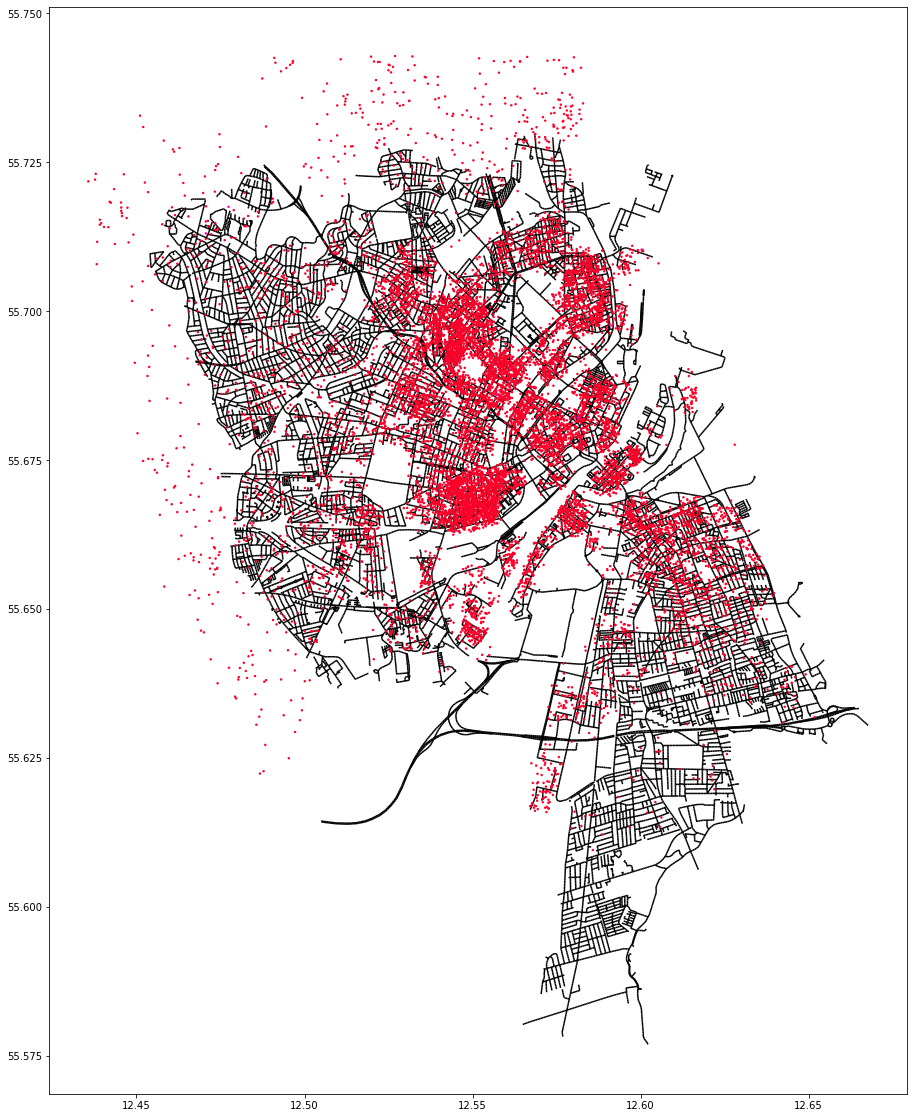

In [94]:
plt.figure(figsize=(15,15))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.

map_data.plot(column="Mixed_BC",zorder=0,cmap="gray",figsize=(20,20))
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)

plt.show();

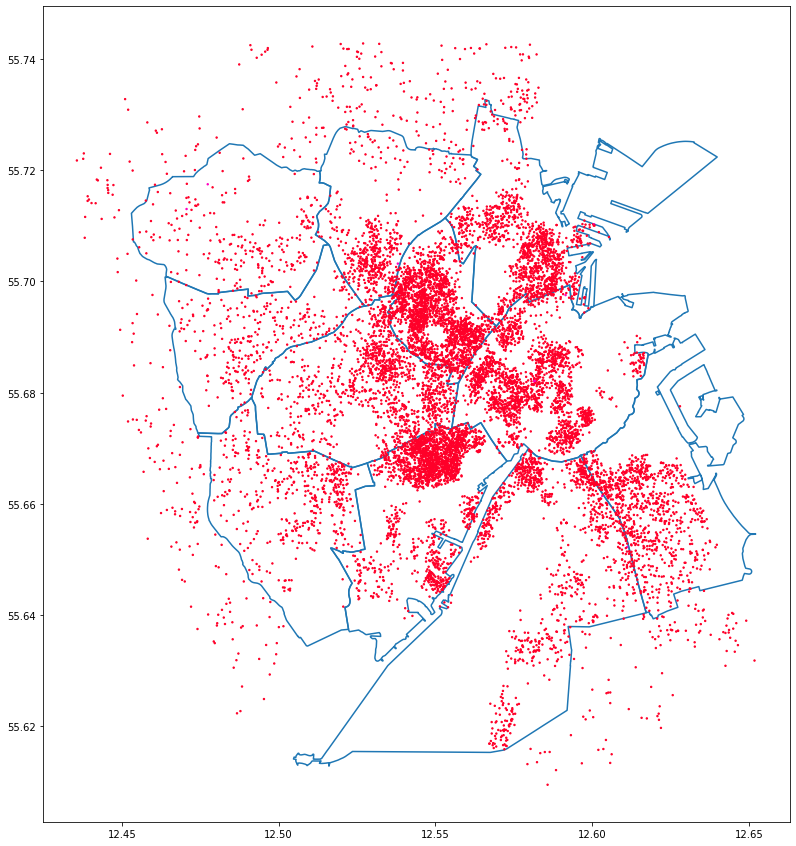

In [103]:
theHoods=gpd.read_file('neighbourhoods.geojson')
theHoods.boundary.plot(figsize=(15,15))
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)


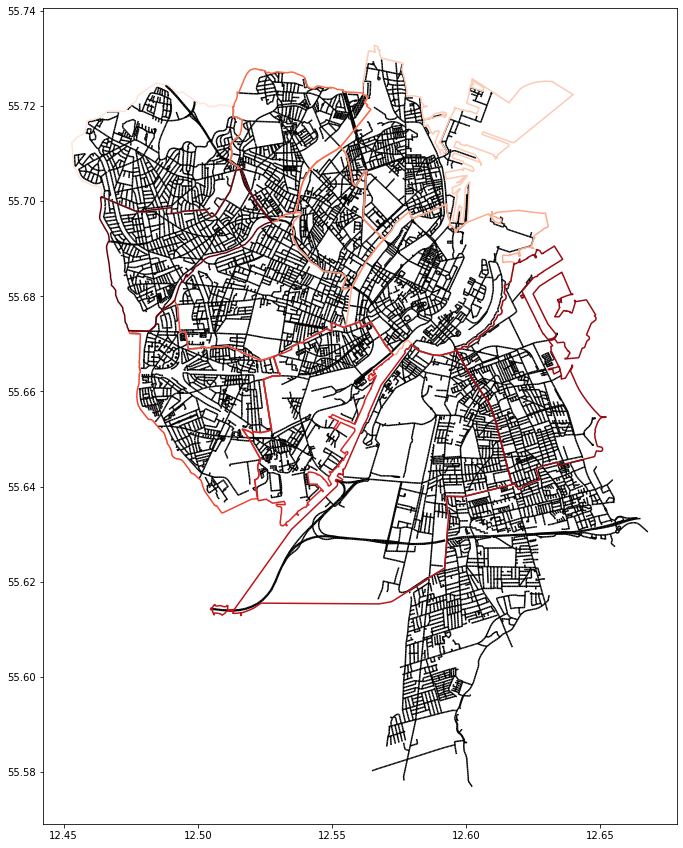

In [104]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

theHoods.boundary.plot(ax=ax,zorder=1,figsize=(15,15),cmap='Reds')
map_data.plot(ax=ax,column="Mixed_BC",zorder=0,cmap="gray")

plt.show();

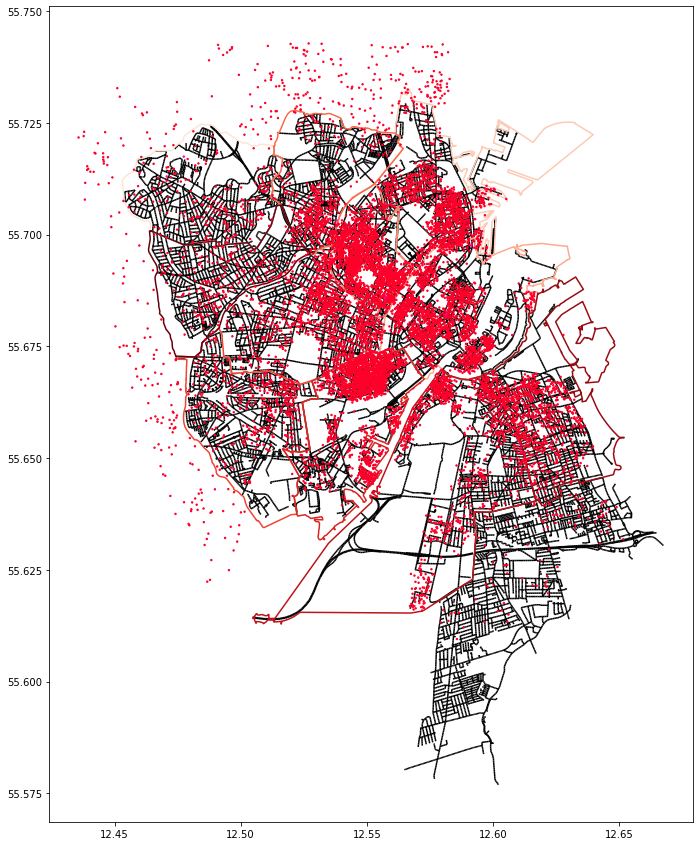

In [105]:
fig, ax = plt.subplots(figsize=(15,15)) #Has to be treated as a subplot. See geopandas documentation
ax.set_aspect('equal')

theHoods.boundary.plot(ax=ax,zorder=1,figsize=(15,15),cmap='Reds')
map_data.plot(ax=ax,column="Mixed_BC",zorder=0,cmap="gray")
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)

plt.show();

10


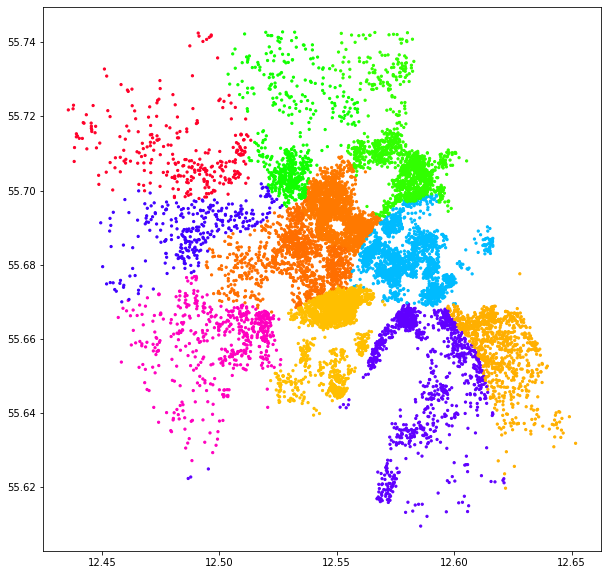

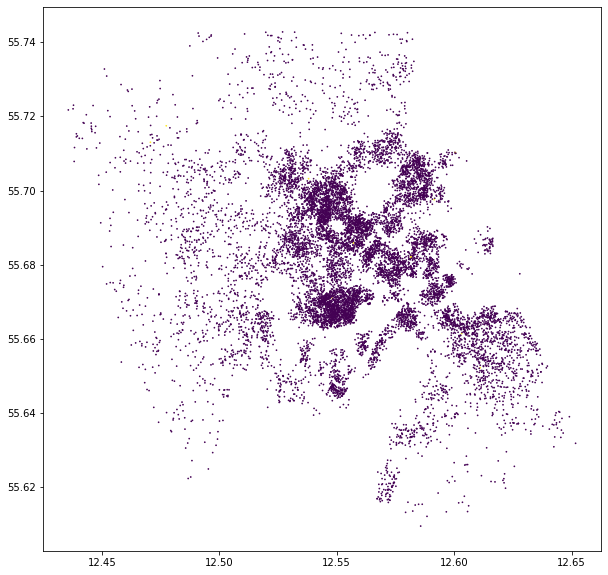

<Figure size 1080x1080 with 0 Axes>

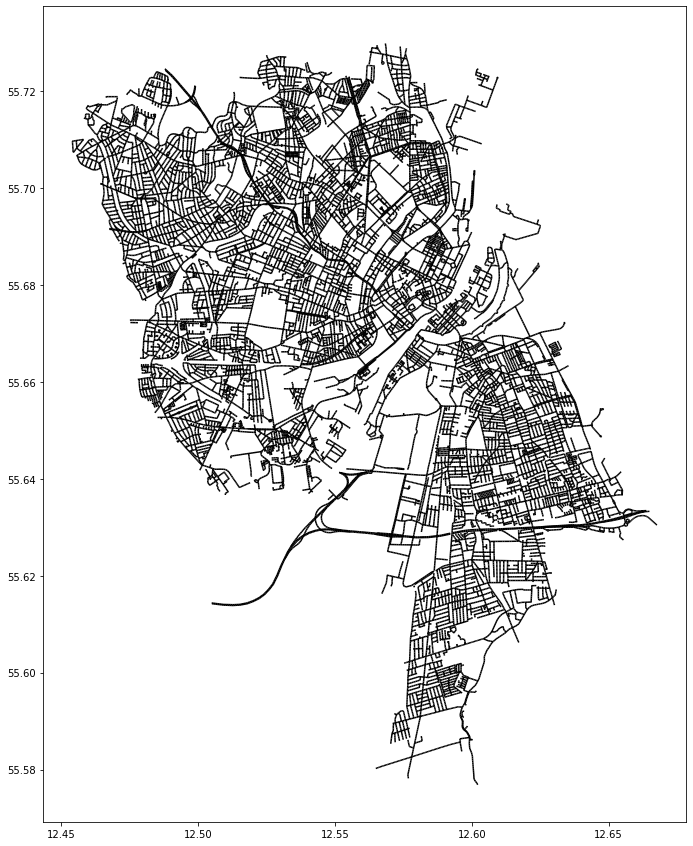

<Figure size 1080x1080 with 0 Axes>

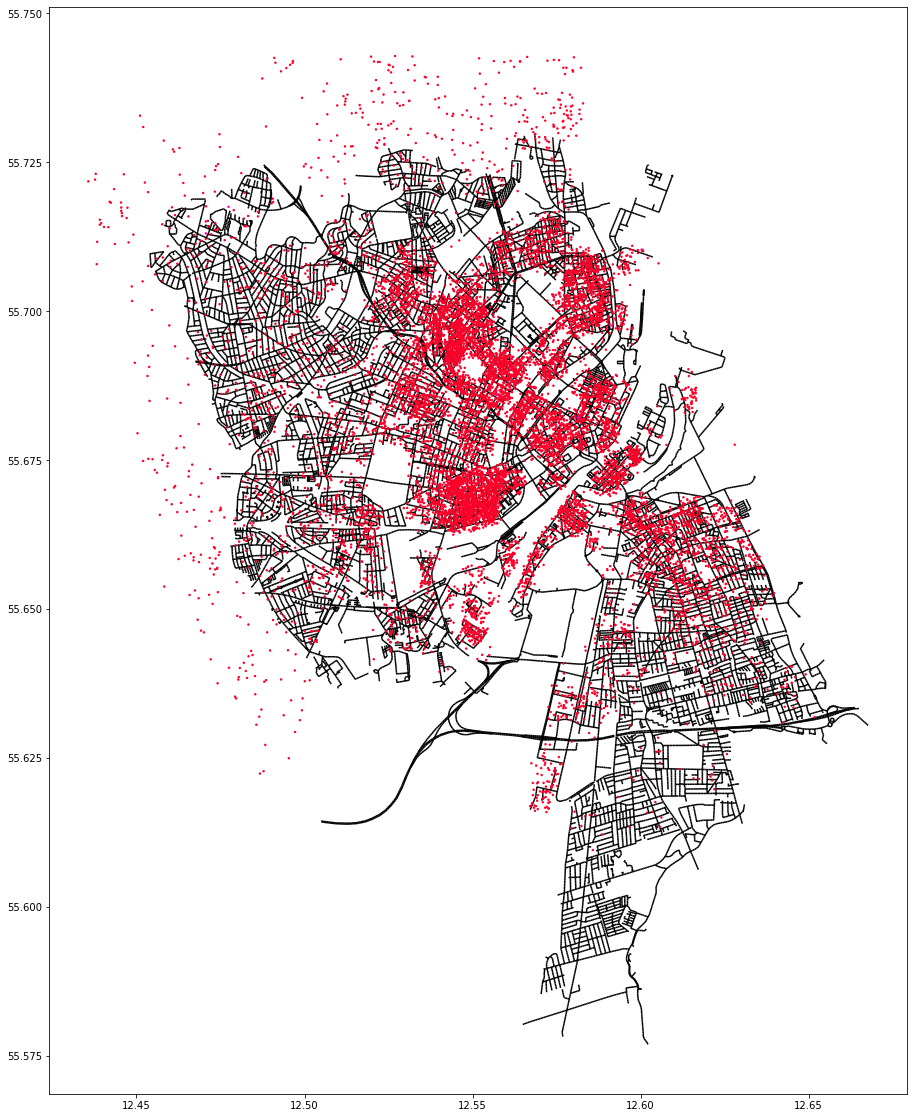

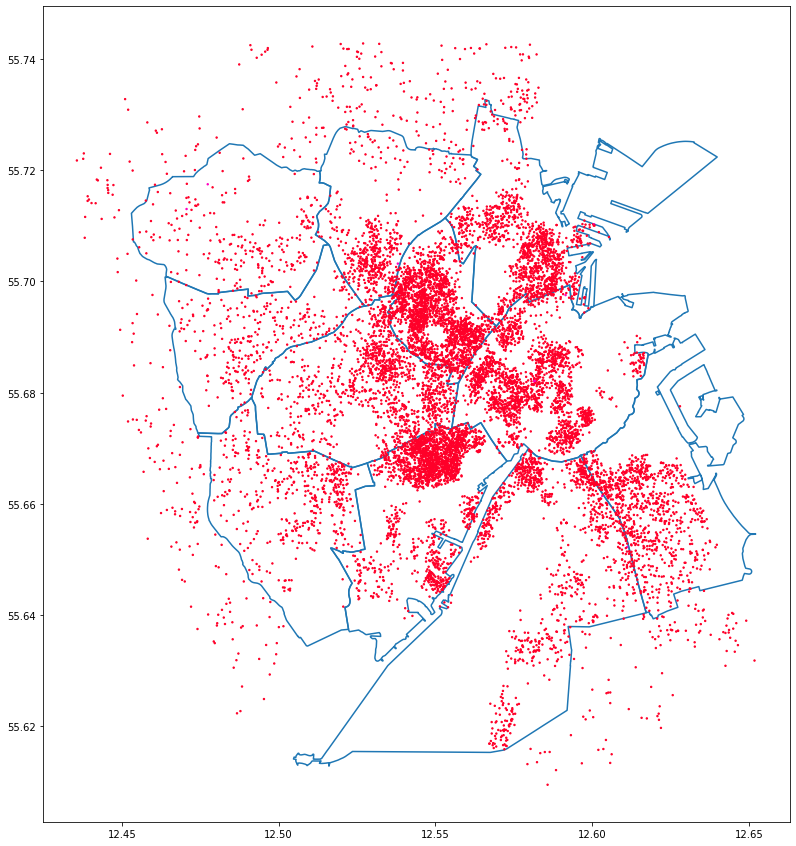

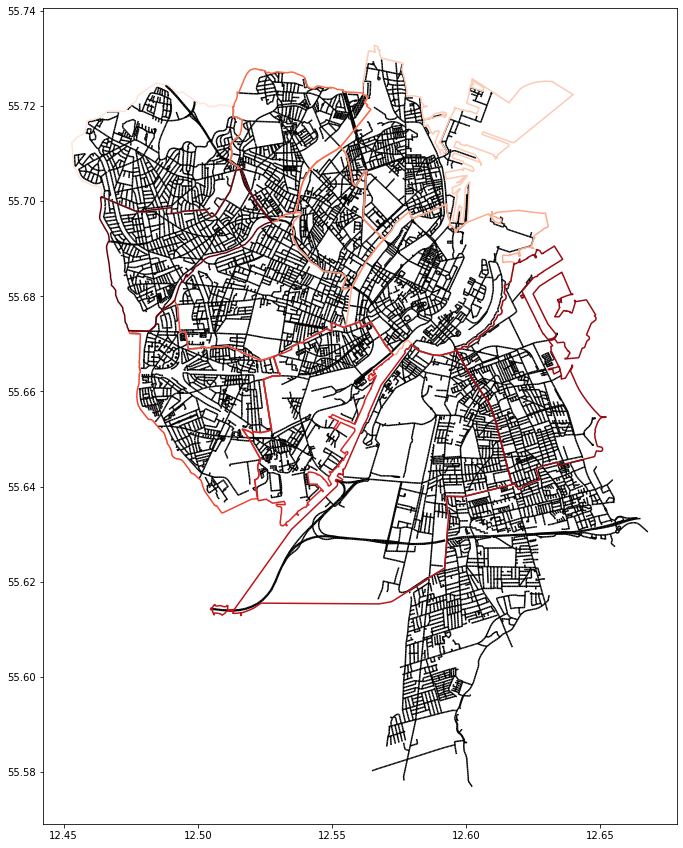

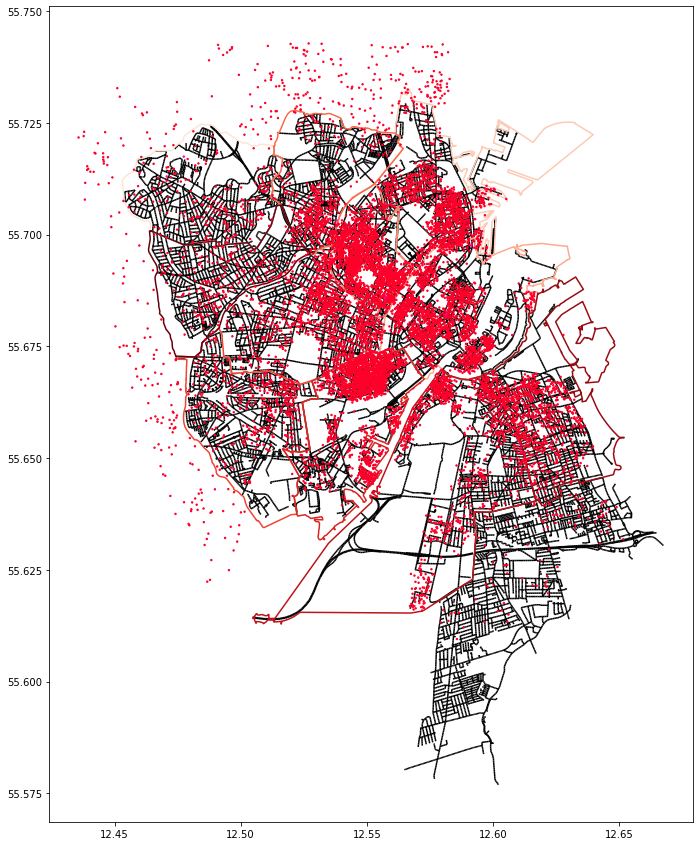

In [106]:
#Find number of neighboorhoods in list
num_neighbourhoods=len(set(data.neighbourhood))-1 # Why -1?
print(num_neighbourhoods)

colors = [float(hash(s) % 256) / 256 for s in data.neighbourhood]      

plt.figure(figsize=(10,10))
plt.scatter(data.longitude,data.latitude, s=5,c=colors,cmap="gist_rainbow",label=data.neighbourhood)
plt.show()


colors = [float(hash(s) % 4) / 4  for s in data.room_type]      

plt.figure(figsize=(10,10))
plt.scatter(data.longitude,data.latitude, s=0.5,c=colors)
plt.show()

import geopandas as gpd
import urllib

url = "https://kkkortdata.spatialsuite.dk/airview/CAV_25May2021.geojson"
remote_data = urllib.request.urlopen(url)
map_data = gpd.read_file(remote_data)
map_data.head()

map_data.Mixed_BC=0
plt.figure(figsize=(15,15))
map_data.plot(column="Mixed_BC", cmap="gray",figsize=(15,15))
plt.show()

plt.figure(figsize=(15,15))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.

map_data.plot(column="Mixed_BC",zorder=0,cmap="gray",figsize=(20,20))
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)

plt.show();

theHoods=gpd.read_file('neighbourhoods.geojson')
theHoods.boundary.plot(figsize=(15,15))
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)



fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

theHoods.boundary.plot(ax=ax,zorder=1,figsize=(15,15),cmap='Reds')
map_data.plot(ax=ax,column="Mixed_BC",zorder=0,cmap="gray")

plt.show();

fig, ax = plt.subplots(figsize=(15,15)) #Has to be treated as a subplot. See geopandas documentation
ax.set_aspect('equal')

theHoods.boundary.plot(ax=ax,zorder=1,figsize=(15,15),cmap='Reds')
map_data.plot(ax=ax,column="Mixed_BC",zorder=0,cmap="gray")
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)

plt.show();

# 1.4

# 2. Prediction challenge

In [ ]:
#write some short text of what is our goal to achieve in this part

# 2.1 Binary classification

# 2.2 Multi class classification

# 3. Exploratory component

In [ ]:
#write short intro of what will be done here